#Import Library

Proses untuk menginisialisasi library yang akan dibutuhkan untuk proses mengolah data untuk Recommendation System

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

#Data Loading
Tahap untuk memuat informasi dataset ke dalam variabel dalam python

In [68]:
url = "/content/drive/MyDrive/File Ozan/Repo Machine Learning/cosmetics.csv"

In [69]:
dataset_init = pd.read_csv(url)
dataset_init

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0


Melihat informasi mengenai dataset antara lain
- Jumlah dan nama kolom
- Jumlah baris dari setiap kolom
- Tipe nullable atau tidak dari tiap kolom
- Tipe data dari tiap kolom

In [70]:
dataset_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


`dataset_init.describe()` Ditujukan untuk mendeskripsikan beberapa parameter untuk seluruh kolom dari dataset. Parameter tersebut antara lain
- Count atau jumlah baris dari setiap kolom
- Mean atau rata-rata dari setiap kolom
- Standar deviasi dari setiap kolom
- Nilai minimum / terkecil dari setiap kolom
- Nilai kuartil pertama atau 25% dari setiap kolom
- Nilai kuartil kedua atau 50% atau median dari setiap kolom
- Nilai kuartil ketiga atau 75% dari setiap kolom
- Nilai maximum / terbesar dari setiap kolom

In [71]:
dataset_init.describe()

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


`dataset_init.columns` Ditujukan untuk mejabarkan kolom apa saja yang tersedia pada dataset yang digunakan

In [72]:
dataset_init.columns

Index(['Label', 'Brand', 'Name', 'Price', 'Rank', 'Ingredients', 'Combination',
       'Dry', 'Normal', 'Oily', 'Sensitive'],
      dtype='object')

`dataset_init.shape` Ditujukan untuk mejabarkan jumlah baris dan kolom pada dataset

In [73]:
dataset_init.shape

(1472, 11)

#Data Preparation
Tahap untuk mengolah data agar data siap digunakan untuk proses membuat sistem rekomendasi. Tahapan yang dilakukan antara lain
- `Check Missing Value` : Melakukan pengecekan missing value dalam data (bisa NULL atau 0) menyesuaikan analisis masalah
- `Univariate Analysis` : Pada tahap ini merupakan proses untuk mengeksplorasi dan menjelaskan setiap variabel dalam kumpulan data secara terpisah untuk 1 jenis variabel / kolom
- `Multivariate Analysis` : Pada tahap ini merupakan proses untuk mengeksplorasi dan menjelaskan setiap variabel dalam kumpulan data secara terpisah untuk 2 atau lebih jenis variabel / kolom


###Check Missing Value

In [9]:
dataset = dataset_init
# dataset.isnull().sum()*100/dataset.shape[0]
dataset.isnull().sum()

Label          0
Brand          0
Name           0
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64

###Univariate Analysis

In [ ]:
numerical_features = ['Price', 'Rank', 'Combination','Dry', 'Normal', 'Oily', 'Sensitive']
categorical_features = ['Label', 'Brand']

In [10]:
df = dataset_init

#####Categorical Features

             jumlah sampel  persentase
Moisturizer            298        20.2
Cleanser               281        19.1
Face Mask              266        18.1
Treatment              248        16.8
Eye cream              209        14.2
Sun protect            170        11.5


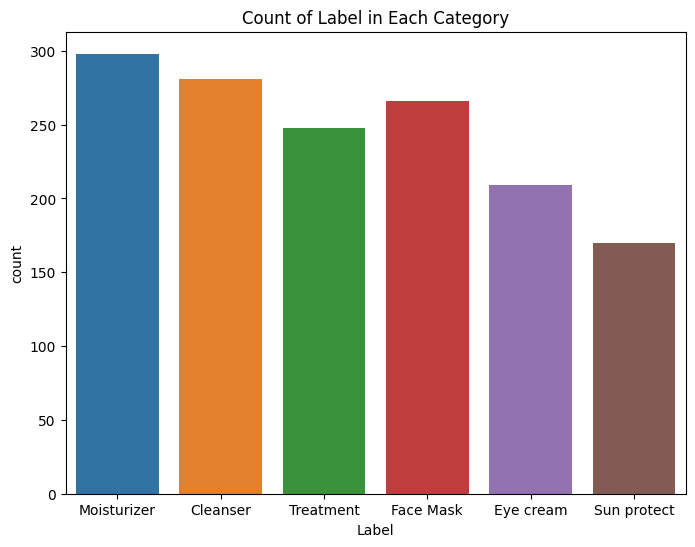

In [11]:
count = dataset['Label'].value_counts()
percent = 100*dataset['Label'].value_counts(normalize=True)
dfprint = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dfprint)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Label')
plt.title('Count of Label in Each Category')
plt.show()

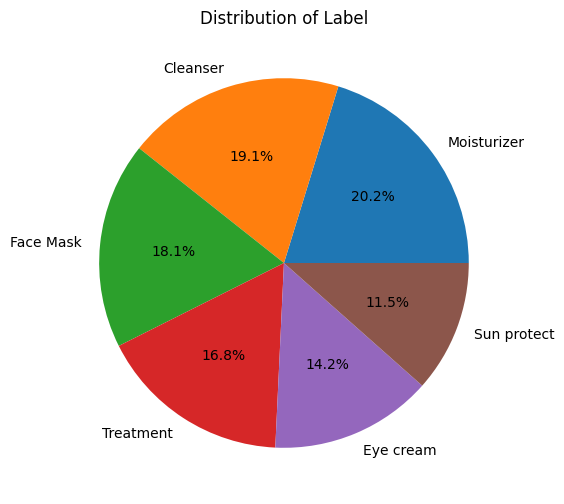

In [12]:
plt.figure(figsize=(8, 6))
df['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Label')
plt.ylabel('')
plt.show()

                    jumlah sampel  persentase
CLINIQUE                       79         5.4
SEPHORA COLLECTION             66         4.5
SHISEIDO                       63         4.3
ORIGINS                        54         3.7
MURAD                          47         3.2
...                           ...         ...
SON & PARK                      1         0.1
MAKEUP ERASER                   1         0.1
KAT VON D                       1         0.1
NURSE JAMIE                     1         0.1
DERMAFLASH                      1         0.1

[116 rows x 2 columns]


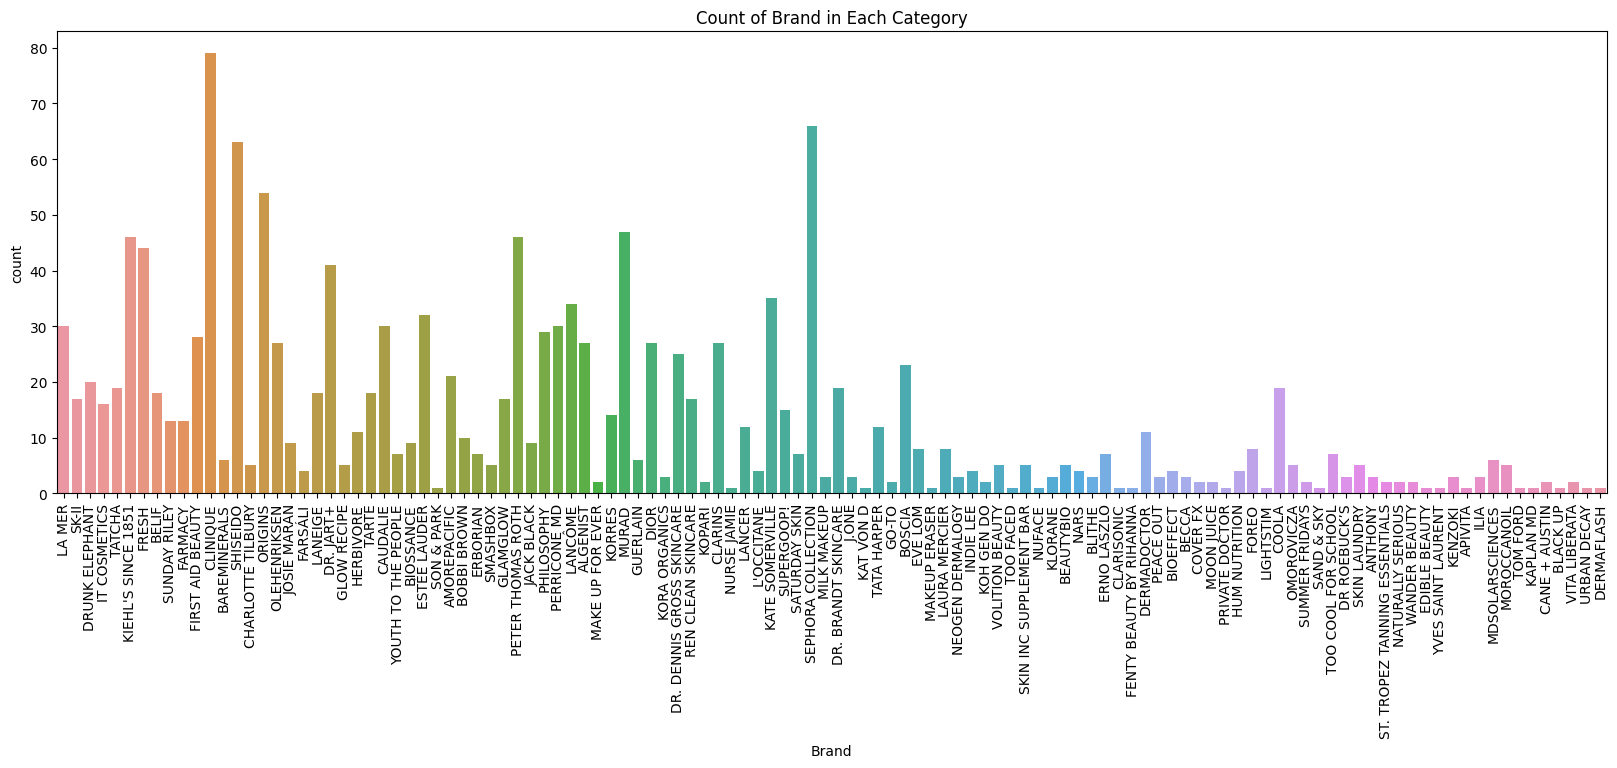

In [13]:
count = dataset['Brand'].value_counts()
percent = 100*dataset['Brand'].value_counts(normalize=True)
dfprint = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dfprint)

plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='Brand')
plt.title('Count of Brand in Each Category')
plt.xticks(rotation=90)
plt.show()

<Axes: title={'center': 'Brand (10 Highest)'}>

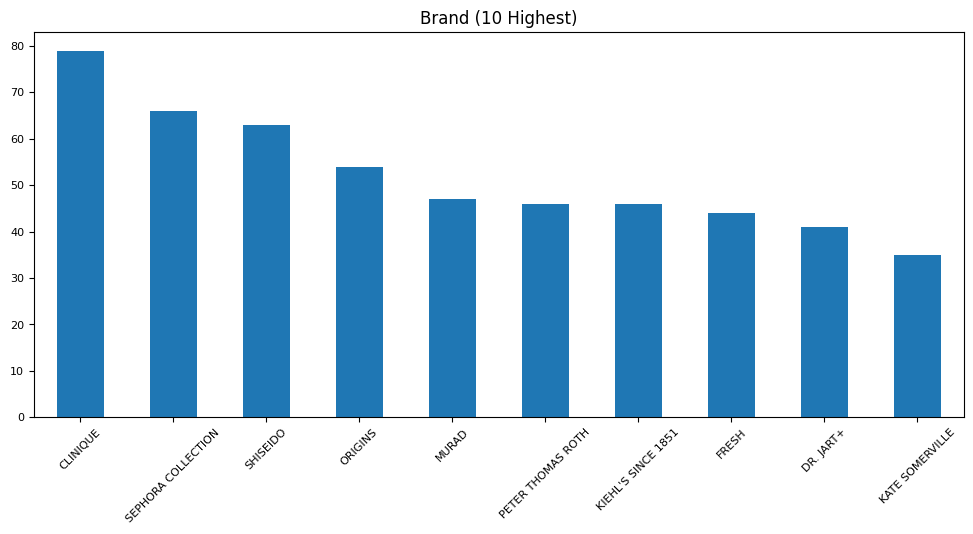

In [14]:
count_for_plot_highest = dataset['Brand'].value_counts().head(10)
count_for_plot_highest.plot(kind='bar', title='Brand' + ' ' + '(10 Highest)', rot=45, figsize=(12,5), fontsize=8)

<Axes: title={'center': 'Brand (10 Lowest)'}>

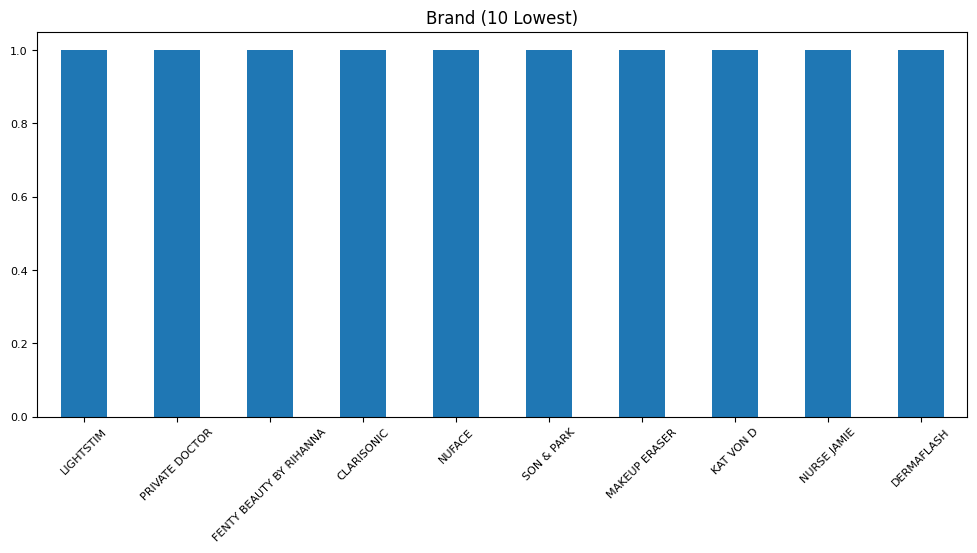

In [15]:
count_for_plot_lowest = dataset['Brand'].value_counts().tail(10)
count_for_plot_lowest.plot(kind='bar', title='Brand' + ' ' + '(10 Lowest)', rot=45, figsize=(12,5), fontsize=8)

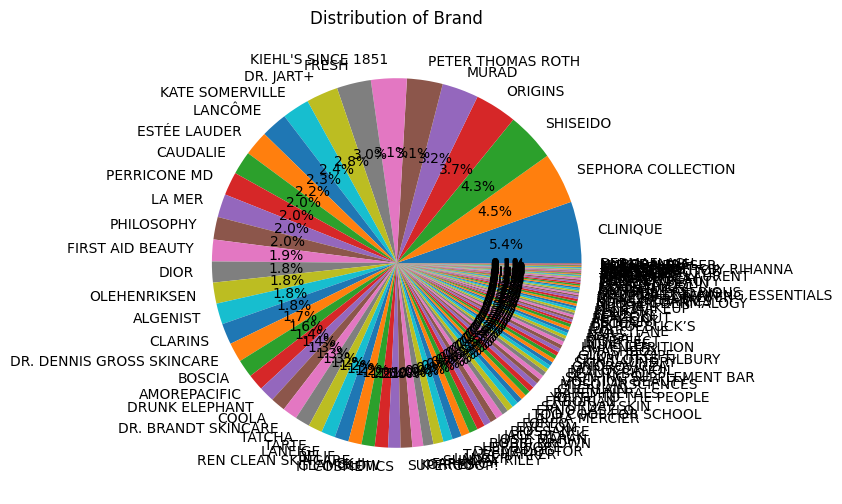

In [16]:
plt.figure(figsize=(8, 6))
df['Brand'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Brand')
plt.ylabel('')
plt.show()

#####Numerical Features

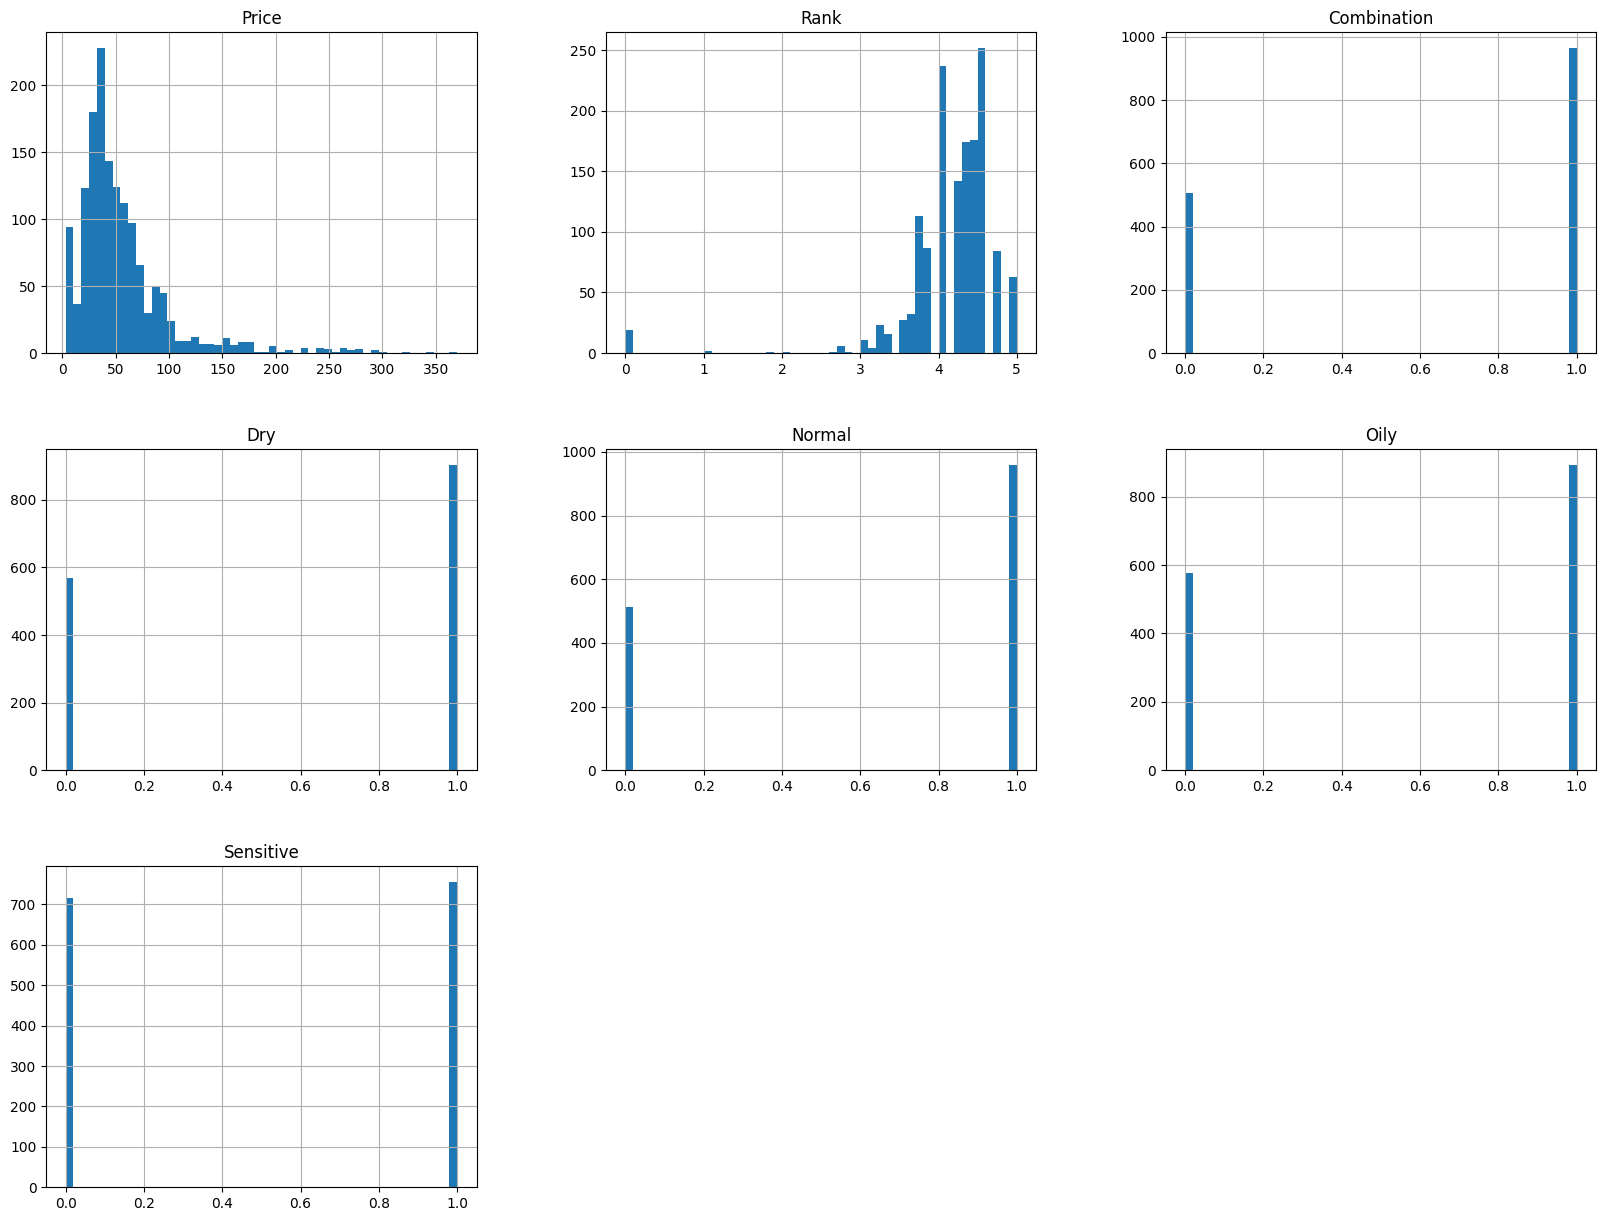

In [17]:
df.hist(bins=50, figsize=(20,15))
plt.show()

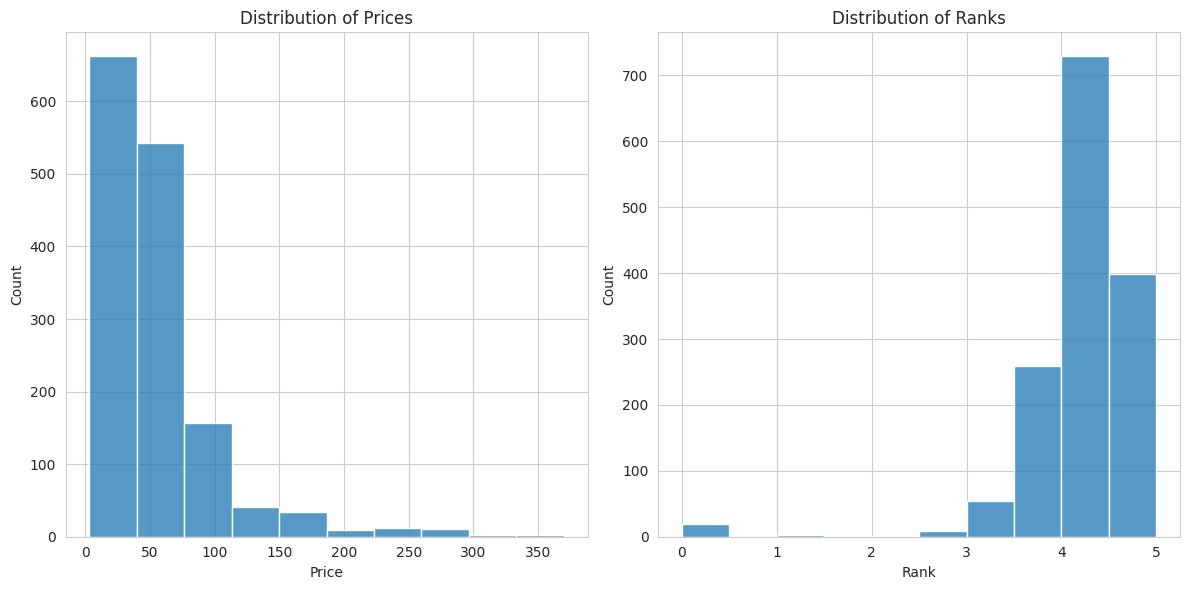

In [18]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot distribution of prices
sns.histplot(data=df, x='Price', bins=10, ax=axes[0])
axes[0].set_title('Distribution of Prices')

# Plot distribution of ratings
sns.histplot(data=df, x='Rank', bins=10, ax=axes[1])
axes[1].set_title('Distribution of Ranks')
plt.tight_layout()
plt.show()

###Multivariate Analysis

In [37]:
dataset = dataset_init

#####Categorical Features

Visualisasi untuk rata-rata kolom `Price` terhadap kolom kategorik `'Brand'` dan `'Label'`

['Brand', 'Label']

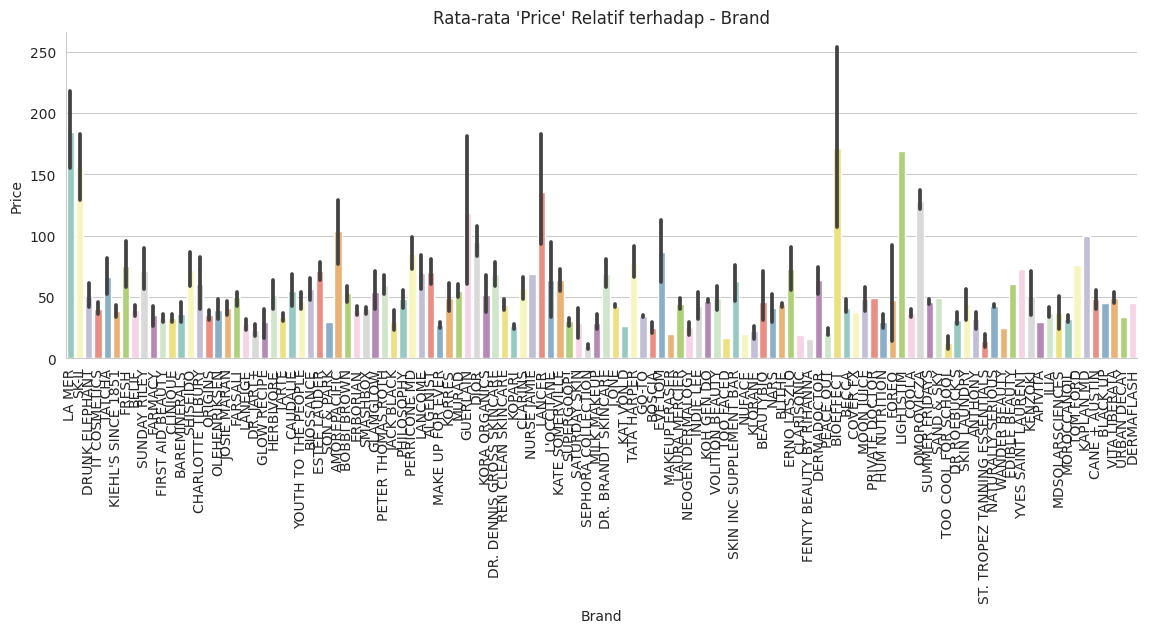

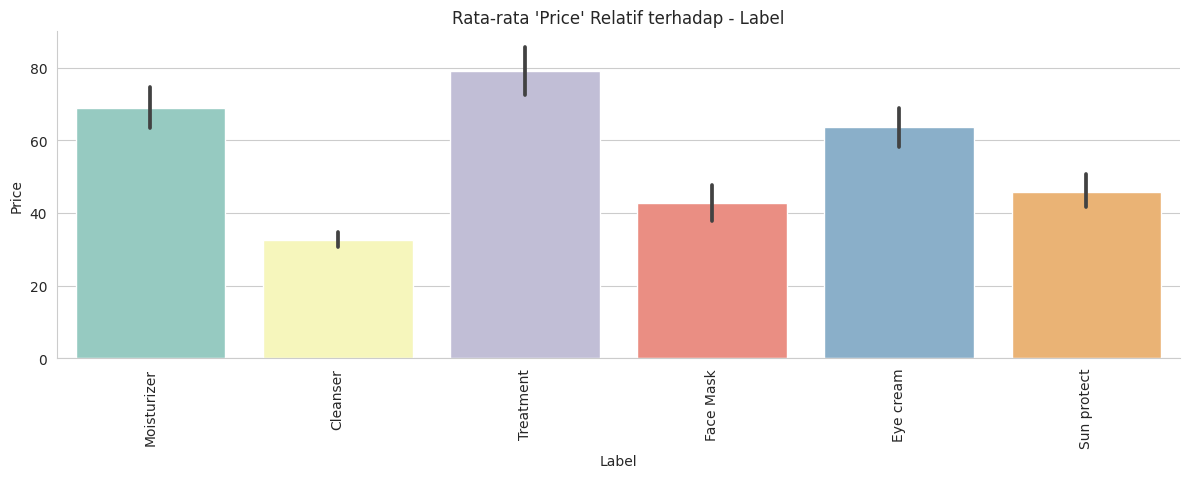

In [38]:
cat_features = dataset.select_dtypes(include='object').columns.difference(['Name','Ingredients']).to_list()

for col in cat_features:
  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 4, aspect = 3,  data=dataset, palette="Set3")
  plt.title("Rata-rata 'Price' Relatif terhadap - {}".format(col))
  plt.xticks(rotation=90)

cat_features

Visualisasi untuk rata-rata kolom `Rank` terhadap kolom kategorik `'Brand'` dan `'Label'`

['Brand', 'Label']

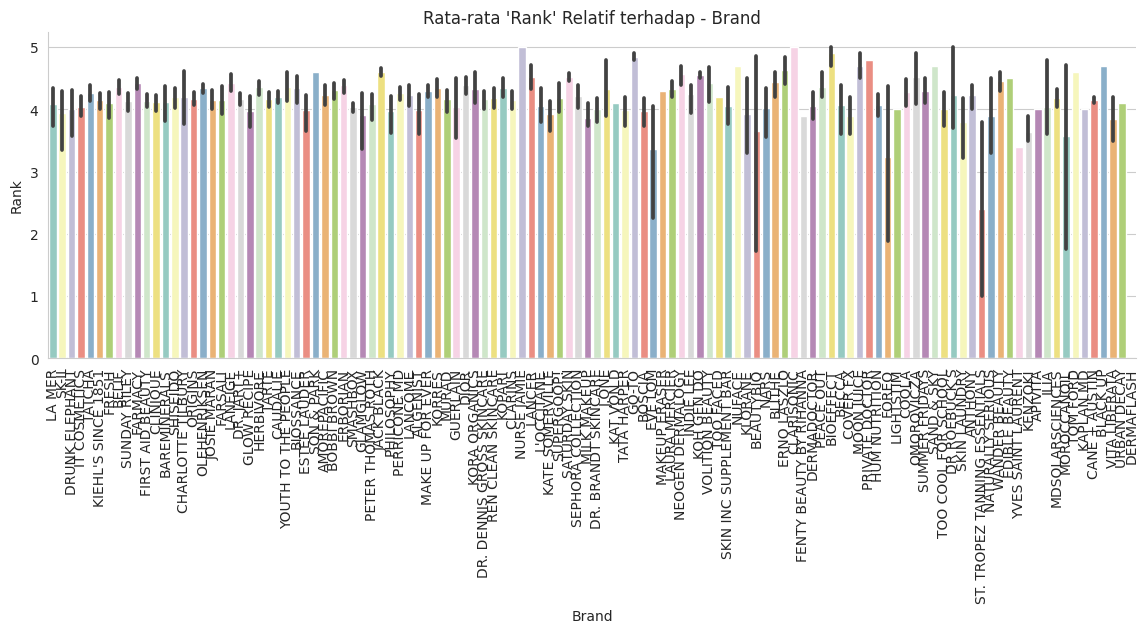

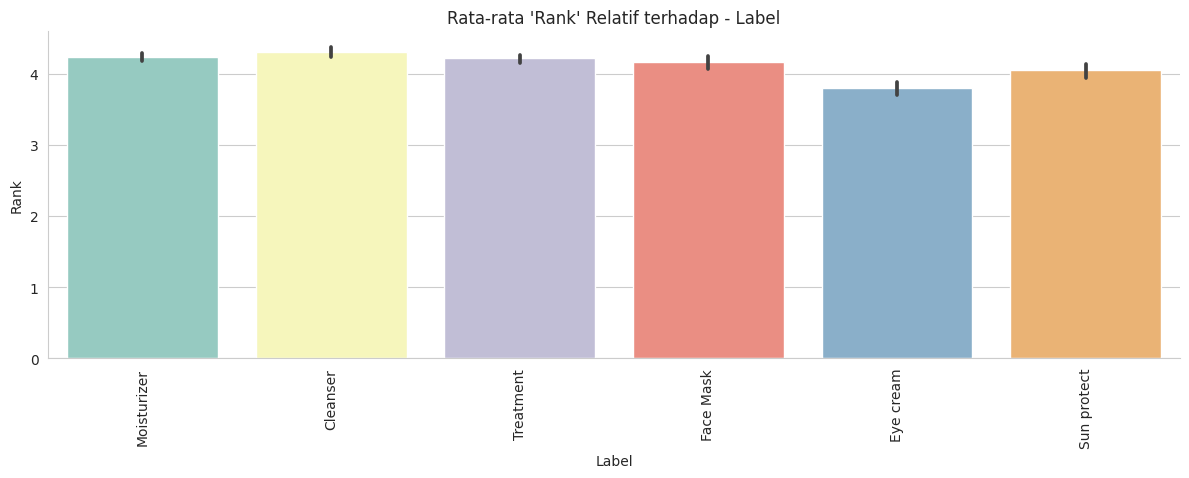

In [40]:
cat_features = dataset.select_dtypes(include='object').columns.difference(['Name','Ingredients']).to_list()

for col in cat_features:
  sns.catplot(x=col, y="Rank", kind="bar", dodge=False, height = 4, aspect = 3,  data=dataset, palette="Set3")
  plt.title("Rata-rata 'Rank' Relatif terhadap - {}".format(col))
  plt.xticks(rotation=90)

cat_features

#####Numerical Features

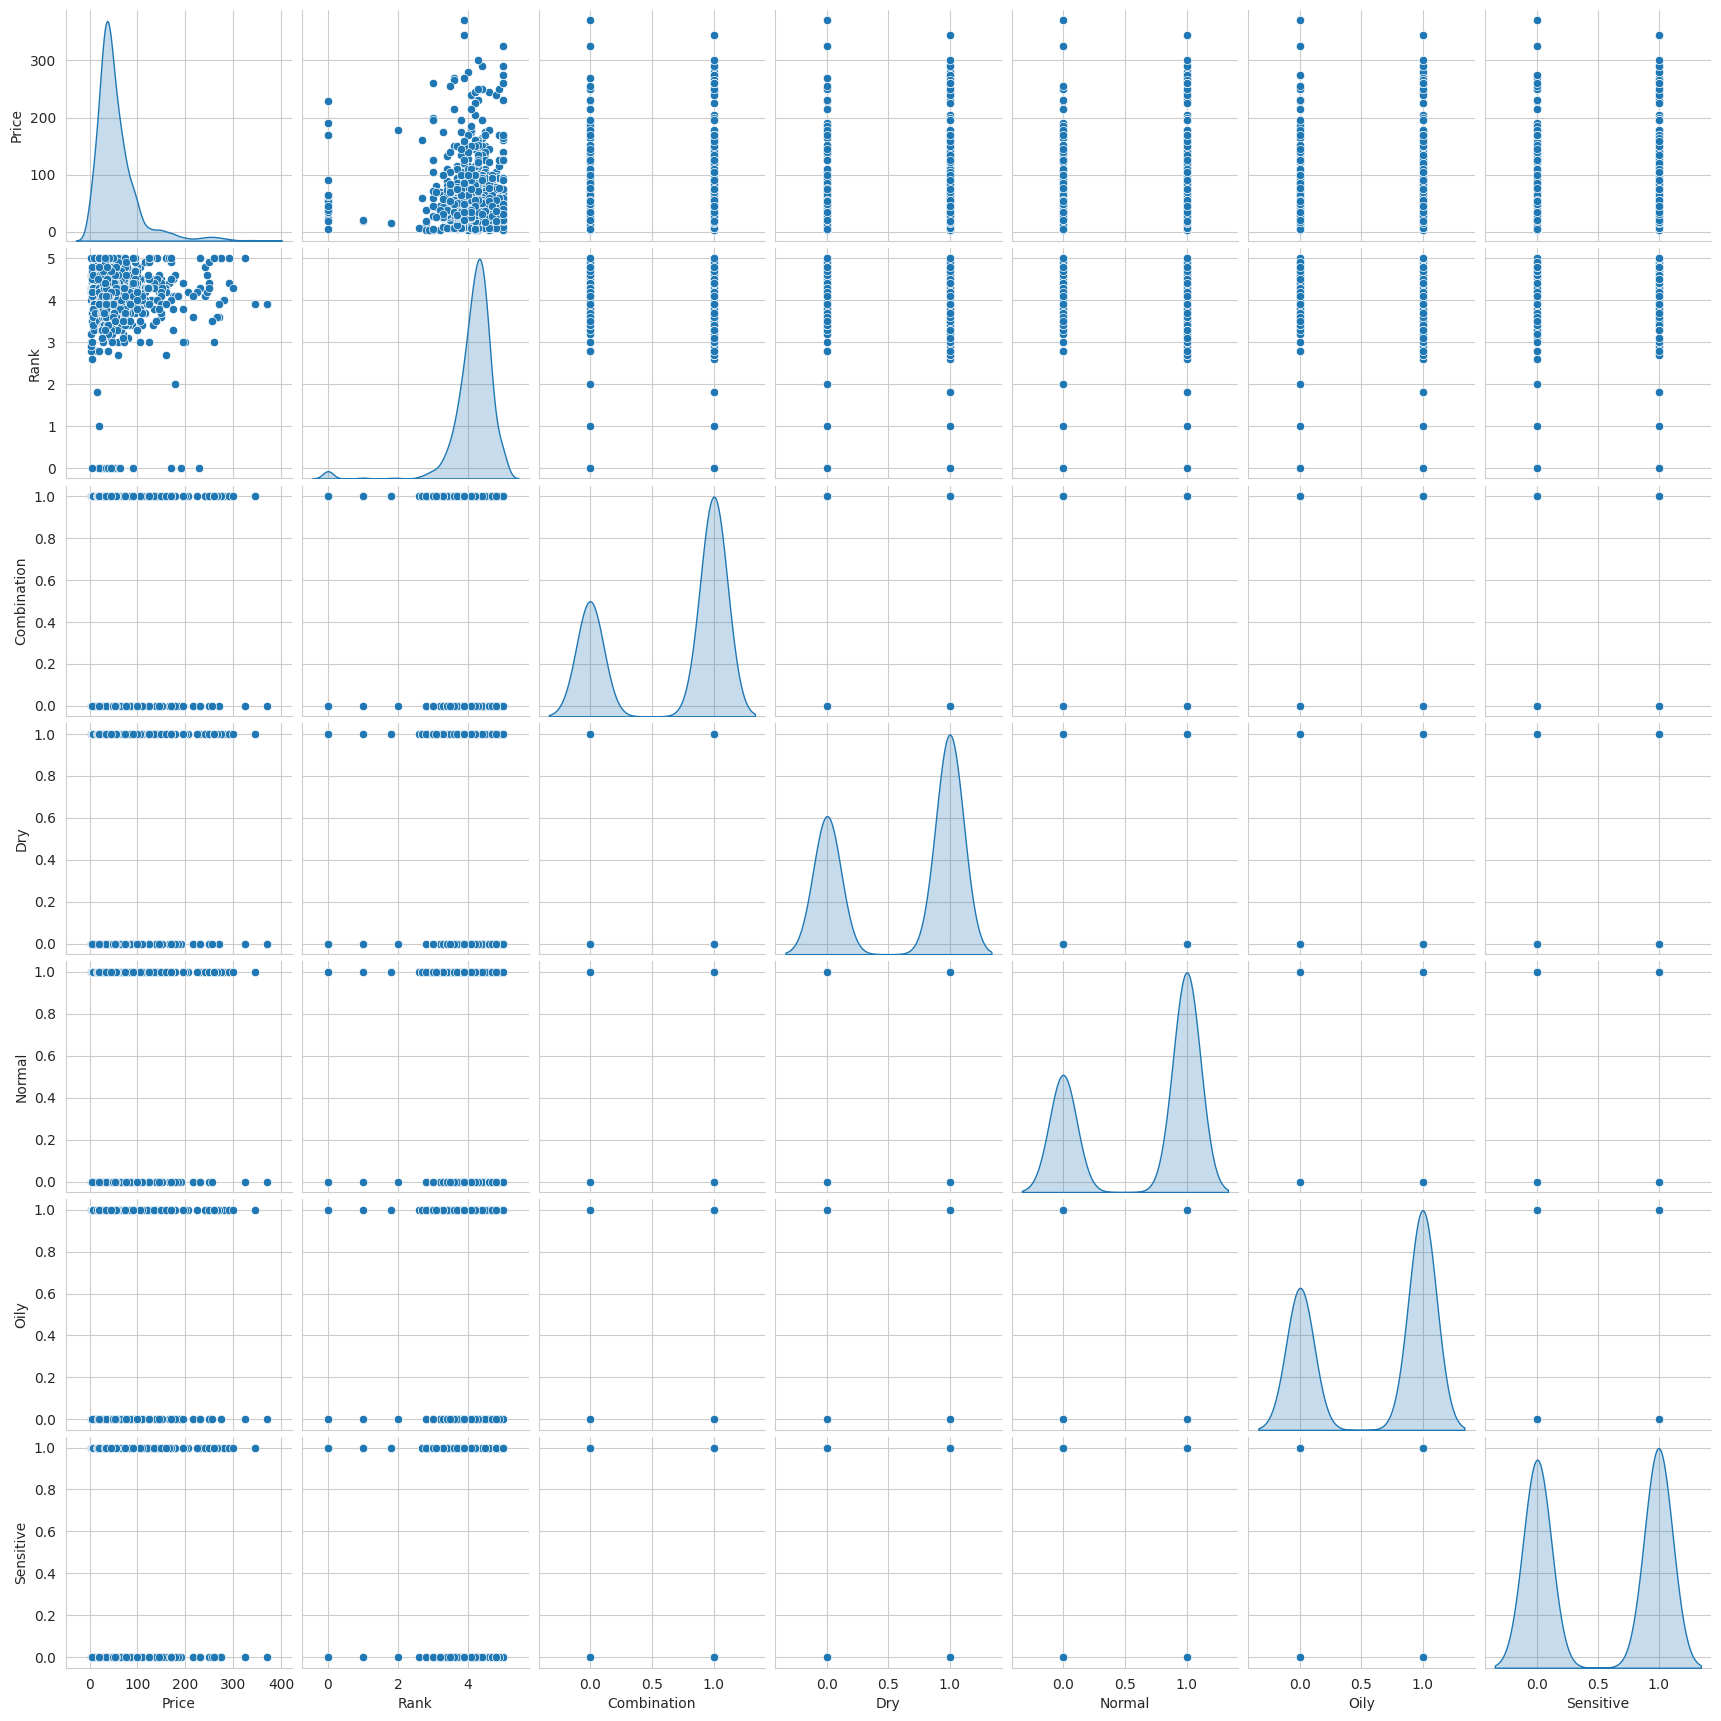

In [39]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

<ipython-input-42-18efc63f0a9b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

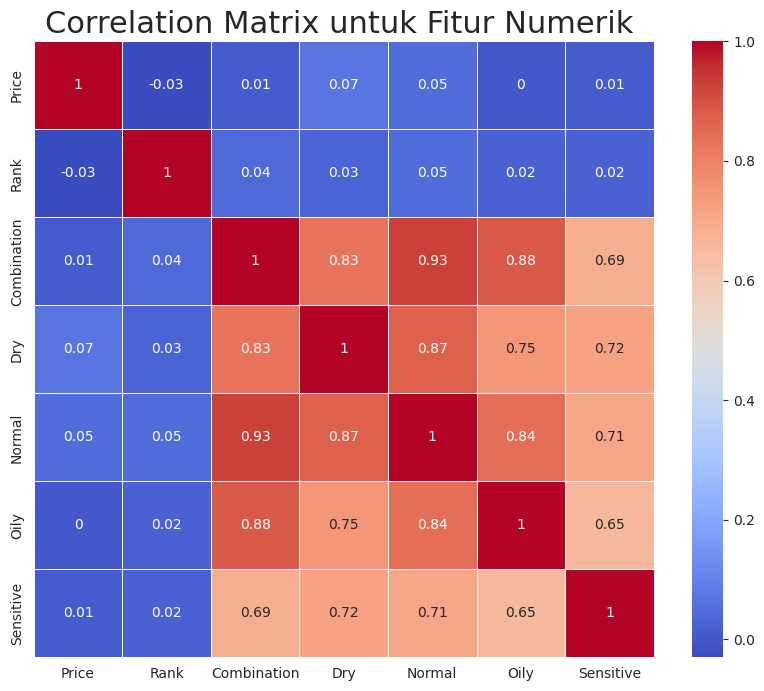

In [42]:
plt.figure(figsize=(10, 8))
correlation_matrix = dataset.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=22)

#Content Based Filtering
Sistem *Content Based Filtering* adalah sistem yang merekomendasikan konten yang mirip dengan konten yang disukai pengguna sebelumnya. Jika suatu konten memiliki karakteristik yang sama atau hampir sama dengan konten lainnya, maka kedua konten tersebut dapat dikatakan mirip.
- `Vektorisasi TF-IDF` : Tahap ini akan dilakukan proses vektorisasi dengan metode yang digunakan untuk menentukan nilai frekuensi sebuah kata di dalam sebuah dokumen atau artikel dan juga frekuensi di dalam banyak dokumen.
- `Cosine Similarity` : Tahap *Cosine Similarity* ditujukan untuk mengukur derajat kesamaan antara dua vektor dan menentukan apakah kedua vektor menunjuk ke arah yang sama. Cara kerja teknik ini dengan menghitung sudut cosinus antara dua vektor. Semakin kecil sudut cosinus antara dua vektor, semakin besar nilai kemiripan cosinusnya.
- `Get Top Recommendation` : Pada tahap ini dilakukan pengujian untuk mengetahui seberapa baik model dalam memberikan sebuah daftar rekomendasi dari sebuah fungsi yang akan menerima beberapa sebuah *input* dalam `nama_kosmetik, similarity_data, items, k` dengan definisi masing-masing parameter sebagai berikut:
    - nama_komsetik: Parameter masukkan nama kosmetik yang ingin diketahui rekomendasinya
    - similarity_data: Parameter yang berisi mengenai similarity yang telah dibuat
    - items: Parameter yang berisi Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah `Name` dan `Label`
    - k: Parameter untuk menentukan jumlah rekomendasi yang ingin diberikan

In [21]:
data = dataset_init
data.sample(5)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
380,Cleanser,CLARINS,Toning Lotion with Camomile,26,4.5,"Water, Sorbitol, Dipropylene Glycol, Oleth-20,...",1,1,1,0,1
534,Cleanser,PHILOSOPHY,Purity Made Simple® Facial Cleansing Gel & Eye...,23,0.0,"Water, Sodium Trideceth Sulfate, Disodium Laur...",0,0,0,0,0
407,Cleanser,CAUDALIE,Deep Cleansing Exfoliator,35,4.6,"Water, Polylactic Acid, Hexyldecyl Stearate, G...",1,1,1,1,1
454,Cleanser,KOPARI,Coconut Rose Toner,24,4.5,"Water, Hamamelis Virginiana (Witch Hazel), Pol...",1,1,1,1,1
841,Face Mask,SAND & SKY,Australian Pink Clay Porefining Face Mask,49,4.7,"Kaolin (Australian Clay), Water, Bentonite, A...",1,1,1,1,0


###Vektorisasi TF-IDF

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
tf.fit(data['Label'])
tf.get_feature_names_out()

array(['cleanser', 'cream', 'eye', 'face', 'mask', 'moisturizer',
       'protect', 'sun', 'treatment'], dtype=object)

In [23]:
print(len(tf.get_feature_names_out()))

9


In [24]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['Label'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(1472, 9)

In [25]:
data['Label'].unique()

array(['Moisturizer', 'Cleanser', 'Treatment', 'Face Mask', 'Eye cream',
       'Sun protect'], dtype=object)

In [26]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.70710678, 0.70710678,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.70710678, 0.70710678,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.70710678, 0.70710678,
         0.        ]])

In [47]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan label
# Baris diisi dengan nama kosmetik

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data['Name']
).sample(9, axis=1).sample(10, axis=0)

,moisturizer,sun,mask,eye,protect,cream,face,cleanser,treatment
Name,,,,,,,,,
DayWear UV Base Advanced Anti-Oxidant & UV Defense SPF 50,0.0,0.707107,0.000000,0.000000,0.707107,0.000000,0.000000,0.0,0.0
Max Mineral Naked Broad Spectrum SPF 45,0.0,0.707107,0.000000,0.000000,0.707107,0.000000,0.000000,0.0,0.0
Tonique Radiance Clarifying Refining Toner,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0
Daywear Advanced Multi-Protection Anti-Oxidant Creme Oil-Free Broad Spectrum SPF 25,0.0,0.707107,0.000000,0.000000,0.707107,0.000000,0.000000,0.0,0.0
Acne Clear Control 30-Day Kit,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
Eye Mask - Grape - Smoothing,0.0,0.000000,0.000000,0.707107,0.000000,0.707107,0.000000,0.0,0.0
Matcha Toner,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0
Quench Intense Hydration Mask,0.0,0.000000,0.707107,0.000000,0.000000,0.000000,0.707107,0.0,0.0
Capture Youth Age-Delay Advanced Crème,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


### Cosine Similarity

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

pd.DataFrame(cosine_sim)

,0,1,2,3,4,5,6,7,8,9,...,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [29]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['Name'], columns=data['Name'])
# cosine_sim_df = pd.DataFrame(cosine_sim, index=data['product_name'], columns=data['product_name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1472, 1472)


Name,GLOWSTARTER™ Mega Illuminating Moisturizer,Secret Sauce Clinically Advanced Miraculous Anti-Aging Moisturizer,Invisimatte Blotting Paper,Water Pocket Sheet Mask Water Bank (Moisturizing),Immortelle Divine Cream
Name,,,,,
Classic Face SPF 30 - Unscented,0.0,0.0,0.0,0.0,0.0
Mist & Fix Setting Spray,1.0,1.0,0.0,0.0,1.0
Liquid Facial Soap,0.0,0.0,1.0,0.0,0.0
Benefiance WrinkleResist24 Day Emulsion Broad Spectrum SPF 18,1.0,1.0,0.0,0.0,1.0
Matcha Toner,0.0,0.0,1.0,0.0,0.0
BIENFAIT MULTI-VITAL - SPF 30 CREAM - High Potency Vitamin Enriched Daily Moisturizing Cream,1.0,1.0,0.0,0.0,1.0
Dark Circle Corrector Set,0.0,0.0,0.0,0.0,0.0
Bio-Performance LiftDynamic Cream,1.0,1.0,0.0,0.0,1.0
Hydro-Dynamic® Ultimate Moisture,1.0,1.0,0.0,0.0,1.0


### Get Recommendation

In [56]:
def cosmetics_recommendations(nama_kosmetik, similarity_data=cosine_sim_df, items=data[['Name', 'Label']], k=5):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe

    Parameter:
    ---
    nama_kosmetik : tipe data string (str)
                Nama Kosmetik (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan label sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_kosmetik].to_numpy().argpartition(range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_kosmetik, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [57]:
test_value = "Help Me"

In [58]:
data[data['Name'].eq(test_value)]

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
705,Treatment,PHILOSOPHY,Help Me,49,4.4,"Water, Caprylic/Capric Triglyceride, Emulsfyin...",0,0,0,0,0


In [59]:
# Mendapatkan rekomendasi kosmetik yang mirip dengan data `test_value`
cosmetics_recommendations(test_value, k=10)

,Name,Label
0,Ferulic + Retinol Wrinkle Recovery Peel,Treatment
1,Concentrated Reconstructing Serum,Treatment
2,High Potency Classics: Hyaluronic Intensive Mo...,Treatment
3,EradiKate™ Mask Foam-Activated Acne Treatment,Treatment
4,Crème Ancienne® Supreme Face Serum,Treatment
5,FIRMx Growth Factor Extreme Neuropeptide Serum,Treatment
6,Power Dose Vitamin C,Treatment
7,Kakadu C™ Intensive Vitamin C Peel Pads with F...,Treatment
8,Intensive-C® Radiance Peel,Treatment
9,REVEAL Concentrated Color Correcting Drops,Treatment


In [60]:
data[data['Name'].eq('Acne Solutions BB Cream Broad Spectrum SPF 40')]

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
163,Moisturizer,CLINIQUE,Acne Solutions BB Cream Broad Spectrum SPF 40,39,4.1,"Octinoxate 7.5% , Octisalate 2.0% , Titanium D...",1,0,0,1,0


In [65]:
cosmetics_recommendations('Acne Solutions BB Cream Broad Spectrum SPF 40', k=10)

,Name,Label
0,Crème de la Mer,Moisturizer
1,Truth Revealed™ Brightening Broad Spectrum SPF...,Moisturizer
2,Resilience Lift Night Lifting/Firming Face and...,Moisturizer
3,Resilience Lift Firming/Sculpting Face and Nec...,Moisturizer
4,Cooling Water,Moisturizer
5,100 percent Pure Argan Oil Light,Moisturizer
6,Hungarian Water Essence,Moisturizer
7,Capture Totale Multi-Perfection Creme,Moisturizer
8,Premier Cru Cream,Moisturizer
9,Waterfall Glacier Water Cream,Moisturizer


In [62]:
similarity_data = cosine_sim_df
# nama_resto = "Help Me"
# nama_resto = 'Acne-Clear Invisible Dots'
nama_resto = "Illuminating Eye Crème"
k = 5
items = data[['Name', 'Label']]
items

index = similarity_data.loc[:,nama_resto].to_numpy().argpartition(range(-1, -k, -1))
index

# Mengambil data dengan similarity terbesar dari index yang ada
closest = similarity_data.columns[index[-1:-(k+2):-1]]
closest

closest = pd.DataFrame(closest)
closest

# Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
closest = closest.drop(nama_resto, errors='ignore')
closest

output = pd.DataFrame(closest).merge(items).head(k)
output

,Name,Label
0,Essential-C Eye Cream SPF 15 PA++,Eye cream
1,Resilience Lift Firming/Sculpting Eye Creme,Eye cream
2,Ultimate Miracle Worker Fix Eye Power-Treatment,Eye cream
3,Retinol Fusion PM Eye Cream,Eye cream
4,No Puffery™ Cooling Roll-On For Puffy Eyes,Eye cream
